# Review:

## Main Concepts:

- **Combinatronics:** useful to calculate sample space (permutations and combinations)
- **Probability function:** axiomatic definition and asymptotic interpretation
- **Conditional probability:** how to update the probability of an event after new information is acquire
- **Conditional Probabilities of higher order intersections:** relationship between the joint and conditional probabilities 
- **Baye's rule:** calculation of conditional probabilities based on the law of the total probability 
- **Independence:** $\mathbb{P}(A \cap B)=\mathbb{P}(A)\mathbb{P}(B)$


## Coding:

- **Simulation techniques (Monte Carlo simulations):** calculation of empirical probabilities based on repeating experiments many times.
- **Construction of functions:** the basic use was to create sampling procedures and calculate empirical probabilities.
- **Graphs:** graphing histograms (including creation of new colors) and line plots using the built in graphing function in R
- **Frequently used:** for loops, initialization of empty vectors, logic operators (==, &, string detector), sampling and append.

# Random Variables

- A statistical experiments produces an outcome in a sample space. The probability function assigns a value between 0 and 1 to an event given a sample space: $$P: A\in S \rightarrow P(A)\in[0,1]$$ 
<p>&nbsp;</p>
- **However,  frequently we are more interested in a number that summarizes the outcomes.** 
<p>&nbsp;</p>
- **For instance,** if we randomly select a person with a fever and provide her with a dosage of medicine, the sample space might be the set of all people who currently have a fever. More than calculate the probability of certain event, we are interested in the summary value of **how much did the temperature of the patient decrease**.

### Definition

Let $S$ be the sample space of an experiment. A *random variable* is a function $X$ mapping from $S$ to the real (natural) numbers.

#### Relationship between an event from the sample space and the random variable
suppose $X$ is a *random variable*. The events in the sample space are defined by the values of $X$. For instance $X=2$ is the event consisting of all the outcomes $s \in S$ such that $X(s)=2$.

### Example: 

In [26]:
suppressWarnings(library(stringr))

[1] 3 2 2 1 2 1 1 0

In [30]:
#Suppose that 3 coins are tossed, the sample space is:
S=c('HHH','HHT','HTH','HTT','THH','THT','TTH','TTT')


#The random variable X can be defined as: number of heads observed. Then X is a function mapping from S to the Naturals
X<-function(S){
    str_count(S,'H')
}

X(S)

[1] 3 2 2 1 2 1 1 0

We can use the connection between the random variable and the sample space to find probabilities based on the *random variable* $X$. For instance:

$$P(X=2)=P(\{HHT,HTH,THH\})=\frac{3}{8}$$


In [31]:
X(S)==2
mean(X(S)==2)

[1] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE

[1] 0.375

In [33]:
#Introduction to probabilility distribution function

E<-sample(S,100,replace=TRUE)
E_X<-X(E)
E
E_X

[1] "THT" "THT" "THT" "THH" "HTT" "THH" "HTH" "THT" "THH" "THT" "HTT" "TTH"
 [13] "HHH" "THH" "TTT" "HTH" "HTH" "HHH" "HHH" "THH" "THT" "THH" "HHH" "HTH"
 [25] "THT" "THH" "THH" "HHH" "HTT" "HHT" "HTT" "HTT" "HHT" "HTH" "THT" "HHT"
 [37] "TTT" "HTH" "TTT" "THT" "HHT" "HTT" "TTH" "TTT" "HHT" "THH" "HTH" "TTH"
 [49] "THH" "HTH" "TTT" "TTH" "HTT" "TTT" "THT" "HTH" "HHT" "THH" "HTT" "HTH"
 [61] "HHT" "TTH" "TTH" "HTH" "TTH" "HTH" "HHT" "HTH" "HHH" "THH" "THT" "HHH"
 [73] "HHT" "HHT" "HTT" "TTT" "TTT" "THH" "THH" "TTH" "HTT" "HTH" "TTT" "TTH"
 [85] "THH" "HTT" "THH" "HTT" "THH" "TTT" "THT" "HHH" "HTT" "TTH" "HHT" "HTT"
 [97] "HTT" "HTH" "HTT" "TTT"

[1] 1 1 1 2 1 2 2 1 2 1 1 1 3 2 0 2 2 3 3 2 1 2 3 2 1 2 2 3 1 2 1 1 2 2 1 2 0
 [38] 2 0 1 2 1 1 0 2 2 2 1 2 2 0 1 1 0 1 2 2 2 1 2 2 1 1 2 1 2 2 2 3 2 1 3 2 2
 [75] 1 0 0 2 2 1 1 2 0 1 2 1 2 1 2 0 1 3 1 1 2 1 1 2 1 0

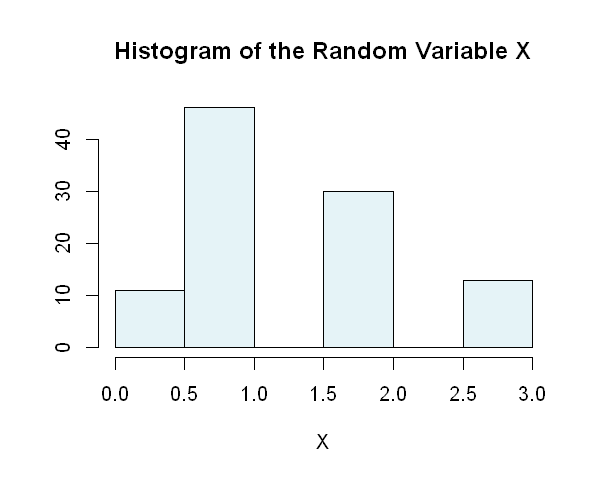

In [29]:
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")

h1<-hist(E_X, breaks=5, ann=FALSE,col=c1)
options(repr.plot.width=5, repr.plot.height=4)
title(main="Histogram of the Random Variable X")
title(xlab="X")

# Some Probability Distributions

### The Binomial Probability Distribution

Apply to situations involving a series of independent and identical trials ($n$), where each trial can have only one of two possible outcomes. One of the outcomes happens with probability $p$ and the other $1-p$.

$$f(k,n,p)=P(X=k;n,p)={n \choose k}p^{k}(1-p)^{n-k}$$

In [5]:
suppressWarnings(library('ggplot2','dplyr'))

In [39]:
dbinom(21,20, 0.5)

[1] 0

In [35]:
choose(20,5)*(0.5)^(5)*(0.5)^(15)

[1] 0.01478577

In [41]:
#The function dbinom returns the probability of x given a number of trials (k) and a probability (p)
#dbinom(x,k,p)

b<-dbinom(1:20, 20, 0.8)
b
round(sum(b),5)


[1] 8.388608e-13 3.187671e-11 7.650410e-10 1.300570e-08 1.664729e-07
 [6] 1.664729e-06 1.331783e-05 8.656592e-05 4.616849e-04 2.031414e-03
[11] 7.386959e-03 2.216088e-02 5.454985e-02 1.090997e-01 1.745595e-01
[16] 2.181994e-01 2.053641e-01 1.369094e-01 5.764608e-02 1.152922e-02

[1] 1

In [42]:
df <- data.frame(x = 1:20, y = b)
df

x,y
1,8.388608e-13
2,3.187671e-11
3,7.650410e-10
4,1.300570e-08
5,1.664729e-07
6,1.664729e-06
7,1.331783e-05
8,8.656592e-05
9,4.616849e-04
10,2.031414e-03


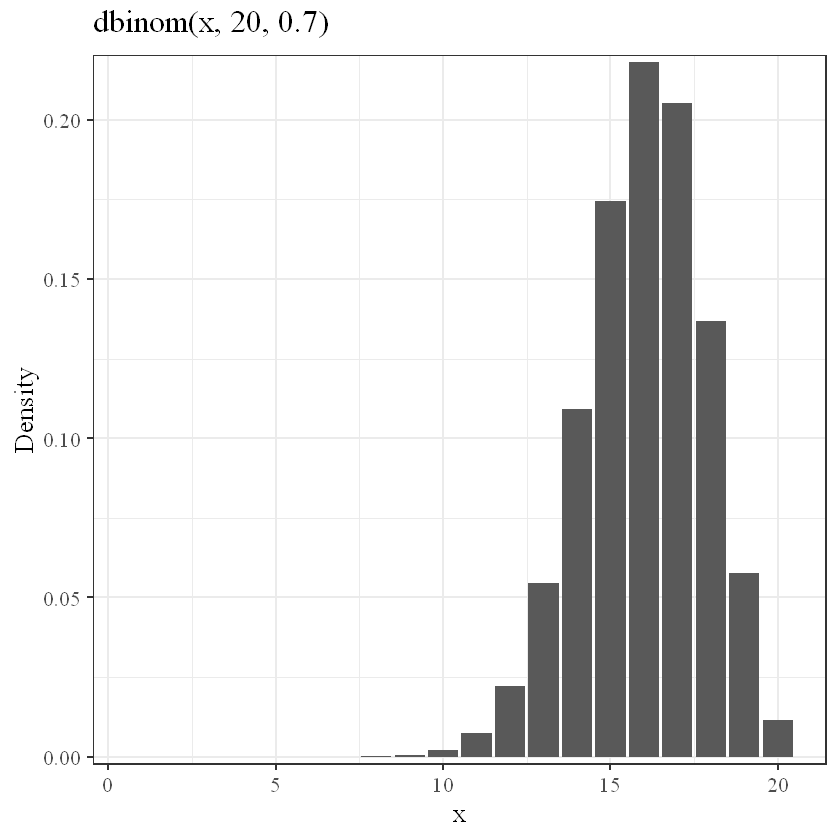

In [44]:
#Create dataframe containing the sequence from 1 to 20 and the associated values for the binomial
df <- data.frame(x = 1:20, y = b)

plot1 <- ggplot(df, aes(x = x, y = y)) + 
  geom_bar(stat = "identity") +#makes the height of the bar proportional to the number of cases in each group
  scale_y_continuous(expand = c(0.01, 0)) + xlab("x") + ylab("Density") + 
  labs(title = "dbinom(x, 20, 0.7)") + theme_bw(16, "serif") + #The classic dark-on-light ggplot2 theme. 
  theme(plot.title = element_text(size = rel(1.2), vjust = 1.5))

print(plot1)

### The Hypergeometric Distribution

This distribution formalizes the urn problems that frequented the probability section. 

*Suppose an urn contains m white balls and n black balls, where m +n = N. Imagine drawing k balls from the urn one at a time without replacing any of the balls selected. At each drawing we record the color of the ball removed. The question is, what is the probability that exactly x white balls are included among the k that are removed?*

The experiment is similar to the binomial. The difference is that because the samples are taken **without replacement**, each drawing is not an independent trial.

$$f(k,n,N,K)=P(X=x)=\frac{{m \choose x}{n \choose k-x}}{{n+m \choose k}}$$

- m is the number of white balls in the urn.
- n is the number of black balls in the urn.
- k the number of balls drawn from the urn

In [25]:
#function dhyper(x, m, n, k)
#Take k=6 balls where there are m=3 white balls and n=7 black balls. What is the probability of getting exactly x=2 white balls

dhyper(2,3,7,6)
dhyper(3,3,7,6)
dhyper(1,3,7,6)

[1] 0.5

[1] 0.1666667

[1] 0.3

In [21]:
c1<-choose(3,2)
c2<-choose(7,4)
c3<-choose(10,6)
c(c1,c2,c3)
(c1*c2)/c3

[1]   3  35 210

[1] 0.5

### Example:

What is the probability of selecting x = 14 red balls from a sample of k = 20 taken from an urn containing m = 70 red balls and n = 30 green balls?

In [6]:
# 1). probability
x = 14
m = 70
n = 30
k = 20
dhyper(x, m, n, k)

[1] 0.21

In [8]:
density = dhyper(x = 1:20, m = m, n = n, k = k)
density

[1] 0.0000000000071 0.0000000003897 0.0000000122311 0.0000002487714
 [5] 0.0000035027011 0.0000355743076 0.0002678536100 0.0015234174068
 [9] 0.0066282020504 0.0222376178792 0.0577600464394 0.1161764570430
[13] 0.1802872109296 0.2140910629788 0.1918255924290 0.1268077834567
[17] 0.0596742510384 0.0188258053871 0.0035533280586 0.0003020328850

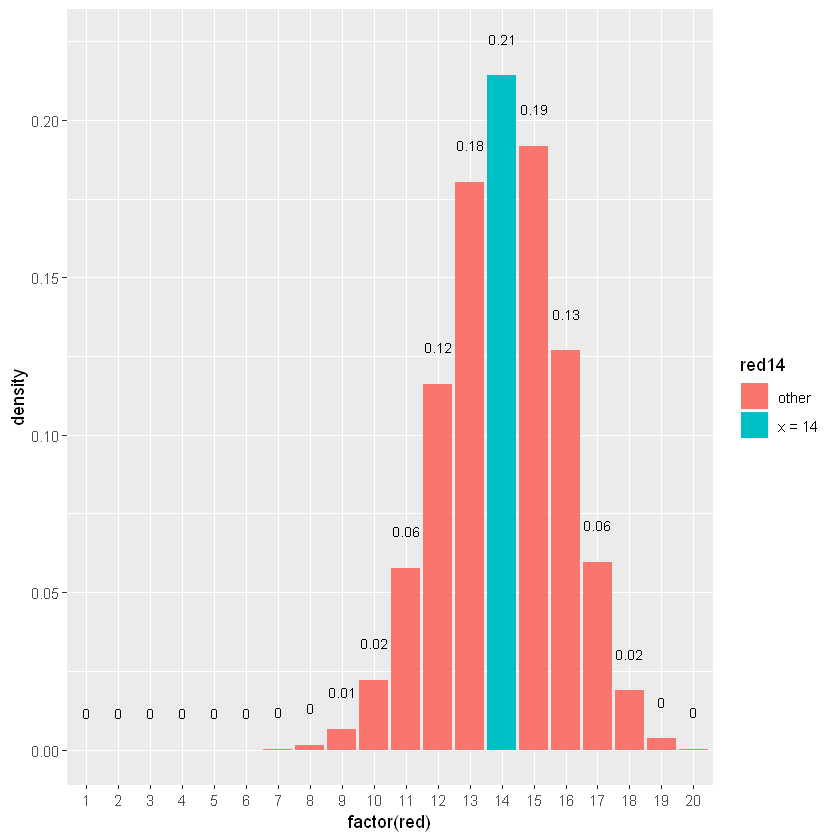

In [14]:
data.frame(red = 1:20, density) %>%
  mutate(red14 = ifelse(red == 14, "x = 14", "other")) %>%
ggplot(aes(x = factor(red), y = density, fill = red14)) +
  geom_col() +
  geom_text(
    aes(label = round(density,2), y = density + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  )

In [16]:
#Other approach without using infix operator %>%:
dta<-data.frame(red = 1:20, density) %>% mutate(red14 = ifelse(red == 14, "x = 14", "other"))
dta

red,density,red14
1,0.0000000000071,other
2,0.0000000003897,other
3,0.0000000122311,other
4,0.0000002487714,other
5,0.0000035027011,other
6,0.0000355743076,other
7,0.0002678536100,other
8,0.0015234174068,other
9,0.0066282020504,other
10,0.0222376178792,other


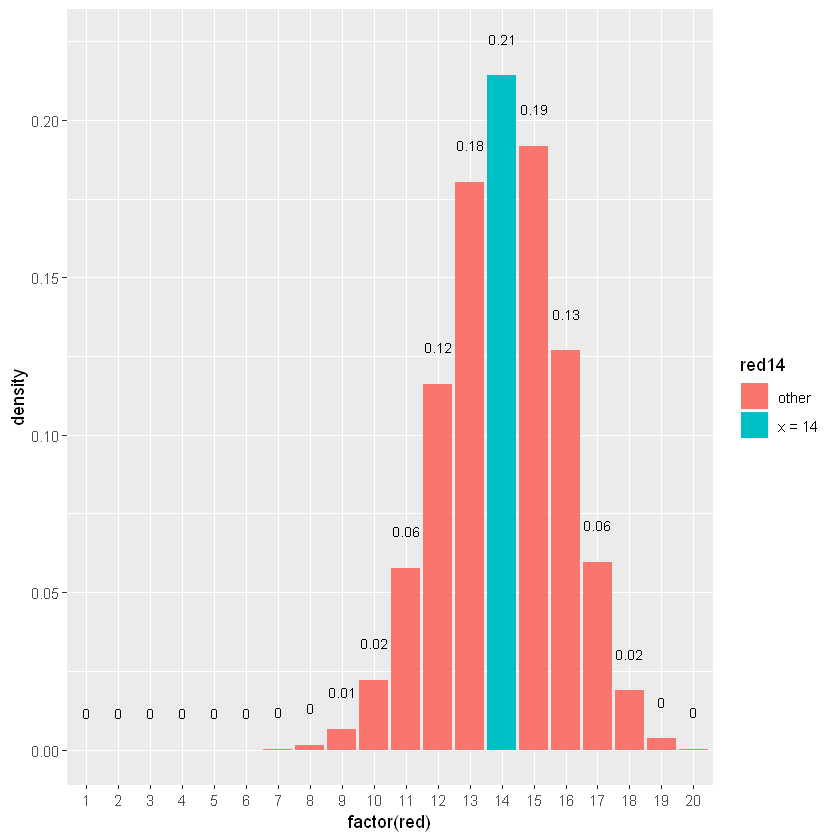

In [17]:
#Other approach without using infix operator %>%:
ggplot(data=dta,aes(x = factor(red), y = density, fill = red14)) +
  geom_col() +
  geom_text(
    aes(label = round(density,2), y = density + 0.01),
    position = position_dodge(0.9),
    size = 3,
    vjust = 0
  )